# Project Inscriptions -- Exploratory Data Analysis

**Johnnatan Messias**, April 2024


In [1]:
import os
from tqdm.notebook import tqdm
import polars as pl
import json
import plotly.graph_objects as go

In [2]:
import sys
code_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "src"))

sys.path.append(code_dir)

In [3]:
from plot_utils import get_plotly_layout
from plot_utils import colors
width, height = 800, 450

In [4]:
# Existing dataset dir
data_dir = '../data/'

# Existing plots dir
plots_dir = data_dir+'/plots/'
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

In [5]:
inscriptions_tag = '0x646174613a'

## Exploratory Data Analysis


In [6]:
def parse_input_data(data):
    response = dict()
    if data is None:
        response = None
    else:
        if data.startswith('data:,{'):
            response['type'] = 'json'
            response['data'] = ','.join(data.split(',')[1:])
        elif data.startswith('data:image/png;'):
            response['type'] = 'image/png'
            response['data'] = ','.join(data.split(',')[1:])
        elif data.startswith('data:application/json,'):
            response['type'] = 'application/json'
            response['data'] = ','.join(data.split(',')[1:])
        elif data.startswith('data:application/json,'):
            response['type'] = 'application/json'
            response['data'] = ','.join(data.split(',')[1:])
        else:
            response['type'] = 'unknown'
            response['data'] = data
    return response

In [7]:
# Loading inscriptions dataframe from a file
inscriptions_df = pl.scan_parquet(
    data_dir+'inscriptions_df.parquet').collect(streaming=True)
print("There are {} inscriptions in our dataset.".format(
    inscriptions_df.shape[0]))
inscriptions_df.head()

There are 17060492 inscriptions in our dataset.


block_number,tx_hash,tx_input_data,issuer,receiver,timestamp,gas_used,gas_effective_price,fees,tx_status,decoded_input_data
i64,str,str,str,str,datetime[μs],i64,i64,f64,i64,str
6332862,"""0x2359c19cc715…","""0x646174613a2c…","""0x86f04d8f599a…","""0x86f04d8f599a…",2023-06-18 02:04:06,215530,250000000,0.000054,1,"""data:,dashboar…"
6351363,"""0x9fb936db1466…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:13:34,221181,250000000,0.000055,1,"""data:image/png…"
6351394,"""0x364528a9e973…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:05,148688,250000000,0.000037,1,"""data:image/png…"
6351410,"""0x0d746c0320ff…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:21,220987,250000000,0.000055,1,"""data:image/png…"
6351431,"""0xcd99fb93cee9…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:42,147604,250000000,0.000037,1,"""data:image/png…"


In [8]:
print("There are {} unique transactions in our dataset.".format(
    inscriptions_df['tx_hash'].n_unique()))
print("There are {} unique issuers in our dataset.".format(
    inscriptions_df['issuer'].n_unique()))
print("There are {} unique blocks in our dataset.".format(
    inscriptions_df['block_number'].n_unique()))
print("The average number of inscriptions per block is {} inscriptions.".format(round(
    inscriptions_df['tx_hash'].n_unique()/inscriptions_df['block_number'].n_unique(), 2)))

print("The minimum and max block numbers containing inscriptions are: {} and {}.".format(
    inscriptions_df['block_number'].min(), inscriptions_df['block_number'].max()))

print("The minimum timestamp is {} and the maximum timestamp is {}.".format(
    inscriptions_df['timestamp'].min(), inscriptions_df['timestamp'].max()))

There are 17054466 unique transactions in our dataset.
There are 470864 unique issuers in our dataset.
There are 2713534 unique blocks in our dataset.
The average number of inscriptions per block is 6.28 inscriptions.
The minimum and max block numbers containing inscriptions are: 6332862 and 29799866.
The minimum timestamp is 2023-06-18 02:04:06 and the maximum timestamp is 2024-03-25 02:19:14.


In [9]:
tokens_df = (inscriptions_df
             .filter(pl.col('decoded_input_data').str.starts_with('data:,{'))
             .with_columns(pl.col('decoded_input_data').str.slice(6).alias('decoded_input_data')))
print("There are {} tokens.".format(tokens_df.shape[0]))
tokens_df.head()

There are 16863729 tokens.


block_number,tx_hash,tx_input_data,issuer,receiver,timestamp,gas_used,gas_effective_price,fees,tx_status,decoded_input_data
i64,str,str,str,str,datetime[μs],i64,i64,f64,i64,str
6359996,"""0x51c592fc710d…","""0x646174613a2c…","""0x171c8be8b926…","""0x171c8be8b926…",2023-06-18 09:38:14,219331,250000000,0.000055,1,"""{""p"":""erc-20"",…"
6360292,"""0xb453be720aee…","""0x646174613a2c…","""0x61fd0d043d51…","""0x61fd0d043d51…",2023-06-18 09:43:10,221045,250000000,0.000055,1,"""{""p"":""erc-20"",…"
6360319,"""0xd6e8059343a9…","""0x646174613a2c…","""0x34e4915528dc…","""0x34e4915528dc…",2023-06-18 09:43:37,220718,250000000,0.000055,1,"""{""p"":""erc-20"",…"
6360372,"""0x91e1c6e17a3f…","""0x646174613a2c…","""0x61fd0d043d51…","""0x61fd0d043d51…",2023-06-18 09:44:30,219600,250000000,0.000055,1,"""{""p"":""erc-20"",…"
6360489,"""0x0c3e0555c76f…","""0x646174613a2c…","""0x531e2b809625…","""0x531e2b809625…",2023-06-18 09:46:28,220008,250000000,0.000055,1,"""{""p"":""erc-20"",…"


In [10]:
# if not os.path.exists(data_dir+'inscriptions_tokens.parquet'):
#     print("File does not exist: Parsing inscriptions -- tokens")
#     df = list()
#     pbar = tqdm(total=tokens_df.shape[0],
#                 desc='Parsing inscriptions -- tokens')
#     for row in tokens_df.iter_rows(named=True):
#         pbar.update(1)
#         try:
#             input_in_json = json.loads(row['decoded_input_data'])
#         except:
#             continue
#         data = {
#             'block_number': row['block_number'],
#             'tx_hash': row['tx_hash'],
#             'issuer': row['issuer'],
#             'timestamp': row['timestamp'],
#             'gas_used': row['gas_used'],
#             'gas_effective_price': row['gas_effective_price'],
#             'fees': row['fees'],
#             'tx_status': row['tx_status'],
#         }
#         data.update(input_in_json)
#         df.append(data)
#     pbar.close()
#     print("There are {} tokens.".format(len(df)))
#     df = pl.DataFrame(df)
#     df.write_parquet(data_dir+'inscriptions_tokens.parquet')
# else:
#     print("Loading inscriptions_tokens.parquet")
#     df = pl.read_parquet(data_dir+'inscriptions_tokens.parquet')
#     print("There are {} tokens.".format(df.shape[0]))
#     df.head()

In [33]:
inscriptions_df.filter(pl.col('decoded_input_data').str.starts_with('data:')).head(10)

block_number,tx_hash,tx_input_data,issuer,receiver,timestamp,gas_used,gas_effective_price,fees,tx_status,decoded_input_data
i64,str,str,str,str,datetime[μs],i64,i64,f64,i64,str
6332862,"""0x2359c19cc715…","""0x646174613a2c…","""0x86f04d8f599a…","""0x86f04d8f599a…",2023-06-18 02:04:06,215530,250000000,0.000054,1,"""data:,dashboar…"
6351363,"""0x9fb936db1466…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:13:34,221181,250000000,0.000055,1,"""data:image/png…"
6351394,"""0x364528a9e973…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:05,148688,250000000,0.000037,1,"""data:image/png…"
6351410,"""0x0d746c0320ff…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:21,220987,250000000,0.000055,1,"""data:image/png…"
6351431,"""0xcd99fb93cee9…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:42,147604,250000000,0.000037,1,"""data:image/png…"
6351443,"""0xa0c43eb48897…","""0x646174613a69…","""0x39ebe965aff2…","""0x39ebe965aff2…",2023-06-18 07:14:54,147716,250000000,0.000037,1,"""data:image/png…"
6351455,"""0xee9be591cef3…","""0x646174613a69…","""0x39ebe965aff2…","""0x39ebe965aff2…",2023-06-18 07:15:06,147681,250000000,0.000037,1,"""data:image/png…"
6351470,"""0xee36abd21817…","""0x646174613a69…","""0x39ebe965aff2…","""0x39ebe965aff2…",2023-06-18 07:15:21,220235,250000000,0.000055,1,"""data:image/png…"
6351484,"""0x7eee16dde0c3…","""0x646174613a69…","""0x39ebe965aff2…","""0x39ebe965aff2…",2023-06-18 07:15:35,147949,250000000,0.000037,1,"""data:image/png…"


In [20]:
inscriptions_df.head()

block_number,tx_hash,tx_input_data,issuer,receiver,timestamp,gas_used,gas_effective_price,fees,tx_status,decoded_input_data
i64,str,str,str,str,datetime[μs],i64,i64,f64,i64,str
6332862,"""0x2359c19cc715…","""0x646174613a2c…","""0x86f04d8f599a…","""0x86f04d8f599a…",2023-06-18 02:04:06,215530,250000000,0.000054,1,"""data:,dashboar…"
6351363,"""0x9fb936db1466…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:13:34,221181,250000000,0.000055,1,"""data:image/png…"
6351394,"""0x364528a9e973…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:05,148688,250000000,0.000037,1,"""data:image/png…"
6351410,"""0x0d746c0320ff…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:21,220987,250000000,0.000055,1,"""data:image/png…"
6351431,"""0xcd99fb93cee9…","""0x646174613a69…","""0x39ebe965aff2…","""0x488bd13f16a2…",2023-06-18 07:14:42,147604,250000000,0.000037,1,"""data:image/png…"


In [11]:
inscriptions_parsed = (tokens_df
                       .with_columns([
                           pl.col('decoded_input_data').str.json_path_match(
                               r"$.p").alias('p'),
                           pl.col('decoded_input_data').str.json_path_match(
                               r"$.op").alias('op'),
                           pl.col('decoded_input_data').str.json_path_match(
                               r"$.tick").alias('tick'),
                           pl.col('decoded_input_data').str.json_path_match(
                               r"$.amt").alias('amt'),
                           pl.col('decoded_input_data').str.json_path_match(
                               r"$.tx").alias('tx'),
                           pl.col('decoded_input_data').str.json_path_match(
                               r"$.price").alias('price'),

                       ]))
inscriptions_parsed

block_number,tx_hash,tx_input_data,issuer,receiver,timestamp,gas_used,gas_effective_price,fees,tx_status,decoded_input_data,p,op,tick,amt,tx,price
i64,str,str,str,str,datetime[μs],i64,i64,f64,i64,str,str,str,str,str,str,str
6359996,"""0x51c592fc710d…","""0x646174613a2c…","""0x171c8be8b926…","""0x171c8be8b926…",2023-06-18 09:38:14,219331,250000000,0.000055,1,"""{""p"":""erc-20"",…","""erc-20""","""mint""","""eths""","""1000""",null,null
6360292,"""0xb453be720aee…","""0x646174613a2c…","""0x61fd0d043d51…","""0x61fd0d043d51…",2023-06-18 09:43:10,221045,250000000,0.000055,1,"""{""p"":""erc-20"",…","""erc-20""","""mint""","""eths""","""1000""",null,null
6360319,"""0xd6e8059343a9…","""0x646174613a2c…","""0x34e4915528dc…","""0x34e4915528dc…",2023-06-18 09:43:37,220718,250000000,0.000055,1,"""{""p"":""erc-20"",…","""erc-20""","""mint""","""eths""","""1000""",null,null
6360372,"""0x91e1c6e17a3f…","""0x646174613a2c…","""0x61fd0d043d51…","""0x61fd0d043d51…",2023-06-18 09:44:30,219600,250000000,0.000055,1,"""{""p"":""erc-20"",…","""erc-20""","""mint""","""eths""","""1000""",null,null
6360489,"""0x0c3e0555c76f…","""0x646174613a2c…","""0x531e2b809625…","""0x531e2b809625…",2023-06-18 09:46:28,220008,250000000,0.000055,1,"""{""p"":""erc-20"",…","""erc-20""","""mint""","""eths""","""1000""",null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
29797541,"""0x6d7a455b610e…","""0x646174613a2c…","""0xd3c90777cd42…","""0xd3c90777cd42…",2024-03-25 01:37:58,306798,25000000,0.000008,1,"""{""p"":""zrc-20"",…","""zrc-20""","""mint""","""sync""","""4""",null,null
29798894,"""0x8107111e20db…","""0x646174613a2c…","""0x04cd82afeda3…","""0x0a88bc5c32b6…",2024-03-25 02:01:56,184878,25000000,0.000005,1,"""{""p"":""layer2-2…","""layer2-20""","""claim""","""$L2""","""1000""",null,null
29799033,"""0xfd3d42ba744c…","""0x646174613a2c…","""0x4280e40231e3…","""0x4280e40231e3…",2024-03-25 02:04:15,146423,25000000,0.000004,1,"""{""p"":""zrc-20"",…","""zrc-20""","""mint""","""sync""","""4""",null,null


In [12]:
inscriptions_parsed.filter(pl.col('price').is_not_null()).head()

block_number,tx_hash,tx_input_data,issuer,receiver,timestamp,gas_used,gas_effective_price,fees,tx_status,decoded_input_data,p,op,tick,amt,tx,price
i64,str,str,str,str,datetime[μs],i64,i64,f64,i64,str,str,str,str,str,str,str
22219206,"""0xccca8ddf683d…","""0x646174613a2c…","""0xcd5446c946f4…","""0xcd5446c946f4…",2023-12-23 11:49:37,204594,150000000,0.000031,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""5""",null,"""10000000000000…"
22233218,"""0x57d7eb724a78…","""0x646174613a2c…","""0xf4f837133a7b…","""0xf4f837133a7b…",2023-12-23 15:55:16,271386,150000000,0.000041,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""5""",null,"""10000000000000…"
22568611,"""0x3c7659c2d3bd…","""0x646174613a2c…","""0x9c4ee801dc5d…","""0x0912d5e42b82…",2023-12-27 21:15:44,250722,150000000,0.000038,1,"""{""p"":""xrs-20"",…","""xrs-20""","""transfer""","""pook""","""170000""",null,"""19700000000000…"
22581154,"""0x5b327033952b…","""0x646174613a2c…","""0xfe85c6f2117e…","""0x0912d5e42b82…",2023-12-28 00:49:55,277520,150000000,0.000042,1,"""{""p"":""xrs-20"",…","""xrs-20""","""transfer""","""pook""","""1000000""",null,"""20000000000000…"
22581168,"""0x43662e5a36e8…","""0x646174613a2c…","""0x7fab58d90ab7…","""0x0912d5e42b82…",2023-12-28 00:50:09,276748,150000000,0.000042,1,"""{""p"":""xrs-20"",…","""xrs-20""","""transfer""","""pook""","""65000""",null,"""20000000000000…"


In [14]:
inscriptions_parsed['op'].unique().to_list()

['mffdfdfdint',
 'mint23523',
 None,
 'min6j6t',
 'min',
 'mint',
 'doge',
 'mwefefint',
 '0x646174613a2c7b2270223a227a72632d3230222c226f70223a226d696e74222c227469636b223a2273796e63222c22616d74223a2234227mint',
 'min6556756t',
 'mintsdaf',
 'mzvdfint',
 'transfer',
 'cancel',
 'list',
 '34345mint',
 '薄荷',
 'minuykyhgt',
 '55253245345mint',
 'mivsfant',
 'adfsmint',
 'mwertint',
 'm45645in54645654t',
 'йуцаmint',
 'mintasdf',
 'mi647567nt',
 'm egrteint',
 'm23fc ewint',
 'm dtrint',
 'sdfgmint',
 'mi',
 'mi b ert ertbnt',
 'miafdsnt',
 'buy',
 'min453t',
 'min6556t',
 'dep',
 'mintdsfkldsjfnç',
 'mintzzzx',
 'claim',
 'zcvmint',
 'minr33r3r3rt',
 'mdsgfint',
 'mi456456546nt',
 'min2435t',
 'burn',
 'minZxct',
 'asdf samint',
 'mцуксint',
 'min56565666',
 'wefmint',
 'mdgfxbbvcxbvcxint',
 'minвапиt',
 '2223mint',
 'mdsfaadsfint',
 'min54645654t',
 ' mint',
 'deploy',
 'sell',
 'mindsfgt',
 'mdsvfint',
 'mwdwddwint',
 'miZxcbnt',
 'mцуйаint',
 'min656u6t',
 'ferwrfwergwergwerwerttwermint

### What are the top deployed inscriptions on zkSync?


In [13]:
inscriptions_parsed['op'].value_counts().sort('count', descending=True).head(10)

op,count
str,u32
"""mint""",11150631
"""claim""",5651954
null,39451
"""deploy""",14990
"""list""",3246
"""transfer""",1314
"""buy""",1206
"""cancel""",719
"""sell""",103


p
zrc-20       9193856
layer2-20    5672385
era-20       1601931
brc-20        254986
Others         89873
zks-20         50698
Name: count, dtype: int64


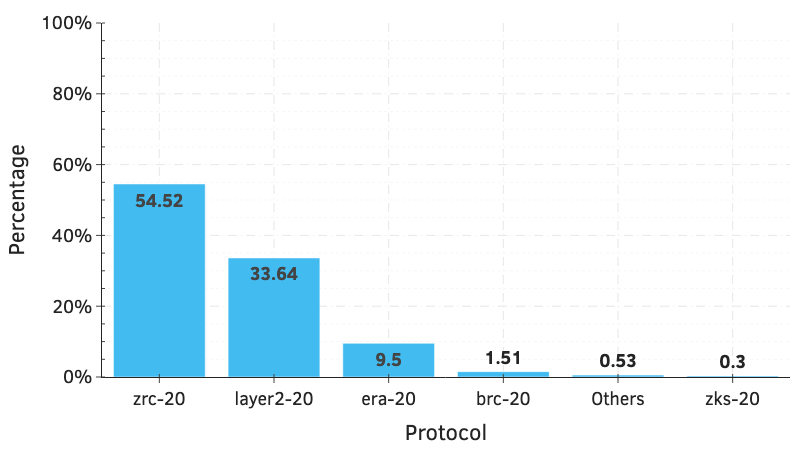

In [14]:
data = inscriptions_parsed[['p']].to_pandas().copy()
top_protocols = data['p'].value_counts().iloc[:5].index
data.loc[~data['p'].isin(top_protocols), 'p'] = 'Others'

print(data['p'].value_counts(normalize=False))
data = data['p'].value_counts(normalize=True)*100

fig = go.Figure(layout=get_plotly_layout(width=width, height=height))

fig.add_trace(go.Bar(x=data.index, y=data.values,
              marker_color=colors['blue'], textposition='auto', text=data.values.round(2), name='Protocols'))
fig.update_layout(yaxis_title="Percentage",
                  xaxis_title="Protocol", yaxis_ticksuffix="%")

fig.update_traces(
    texttemplate='<b>%{text:,.4}</b>', textfont_size=18)
fig.update_yaxes(range=[0, 100])

fig.write_image(plots_dir+"top-15-protocols-zksync.pdf")

fig.show('png')

op
mint        11150631
claim        5651954
Others         41594
deploy         14990
list            3246
transfer        1314
Name: count, dtype: int64


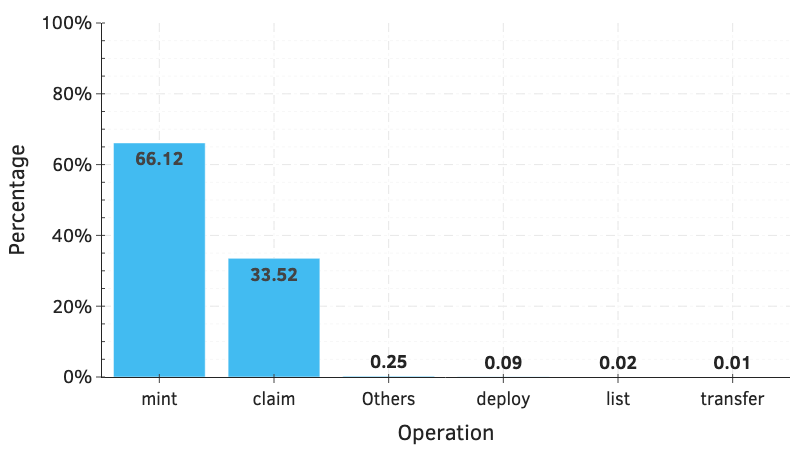

In [15]:
data = inscriptions_parsed[['op']].to_pandas().copy()
top_protocols = data['op'].value_counts().iloc[:5].index
data.loc[~data['op'].isin(top_protocols), 'op'] = 'Others'

print(data['op'].value_counts(normalize=False))
data = data['op'].value_counts(normalize=True)*100

fig = go.Figure(layout=get_plotly_layout(width=width, height=height))

fig.add_trace(go.Bar(x=data.index, y=data.values,
              marker_color=colors['blue'], textposition='auto', text=data.values.round(2), name='Operation'))
fig.update_layout(yaxis_title="Percentage",
                  xaxis_title="Operation", yaxis_ticksuffix="%")

fig.update_traces(
    texttemplate='<b>%{text:,.4}</b>', textfont_size=18)
fig.update_yaxes(range=[0, 100])

fig.write_image(plots_dir+"top-15-operation-zksync.pdf")

fig.show('png')

tick
sync      7009236
$L2       5672713
bgnt      1604378
zkzk      1220449
Others     728245
zksi       628708
Name: count, dtype: int64


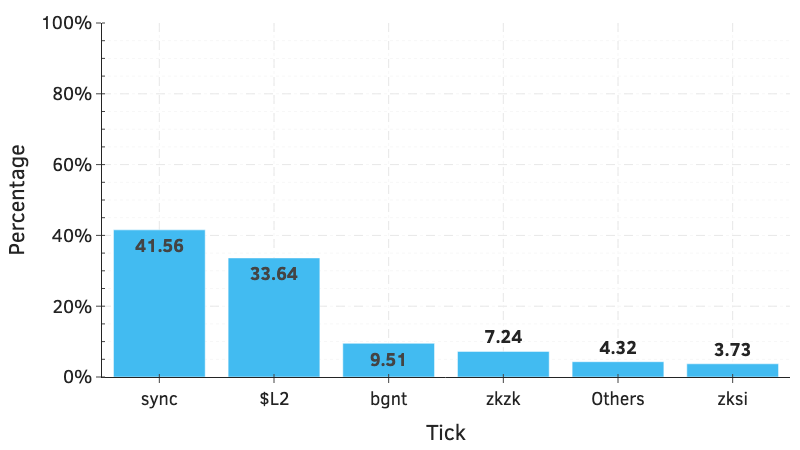

In [16]:
data = inscriptions_parsed[['tick']].to_pandas().copy()
top_protocols = data['tick'].value_counts().iloc[:5].index
data.loc[~data['tick'].isin(top_protocols), 'tick'] = 'Others'

print(data['tick'].value_counts(normalize=False))
data = data['tick'].value_counts(normalize=True)*100

fig = go.Figure(layout=get_plotly_layout(width=width, height=height))

fig.add_trace(go.Bar(x=data.index, y=data.values,
              marker_color=colors['blue'], textposition='auto', text=data.values.round(2), name='Protocols'))
fig.update_layout(yaxis_title="Percentage",
                  xaxis_title="Tick", yaxis_ticksuffix="%")

fig.update_traces(
    texttemplate='<b>%{text:,.4}</b>', textfont_size=18)
fig.update_yaxes(range=[0, 100])

fig.write_image(plots_dir+"top-15-tick-zksync.pdf")

fig.show('png')

In [17]:
inscriptions_parsed.filter(pl.col('tick').eq('bgnt') & pl.col('op').eq('list'))

block_number,tx_hash,tx_input_data,issuer,receiver,timestamp,gas_used,gas_effective_price,fees,tx_status,decoded_input_data,p,op,tick,amt,tx,price
i64,str,str,str,str,datetime[μs],i64,i64,f64,i64,str,str,str,str,str,str,str
22219206,"""0xccca8ddf683d…","""0x646174613a2c…","""0xcd5446c946f4…","""0xcd5446c946f4…",2023-12-23 11:49:37,204594,150000000,0.000031,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""5""",null,"""10000000000000…"
22233218,"""0x57d7eb724a78…","""0x646174613a2c…","""0xf4f837133a7b…","""0xf4f837133a7b…",2023-12-23 15:55:16,271386,150000000,0.000041,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""5""",null,"""10000000000000…"
22890920,"""0x05388d7a8e00…","""0x646174613a2c…","""0x055c851d9d3a…","""0x055c851d9d3a…",2023-12-31 18:38:32,196051,150000000,0.000029,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""5""",null,"""0.000000000000…"
22890935,"""0xda4cbf4cd4e5…","""0x646174613a2c…","""0x055c851d9d3a…","""0x055c851d9d3a…",2023-12-31 18:38:47,176155,150000000,0.000026,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""5""",null,"""0.000000000000…"
22891682,"""0x44c898f21ea3…","""0x646174613a2c…","""0x055c851d9d3a…","""0x055c851d9d3a…",2023-12-31 18:51:40,192144,150000000,0.000029,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""500""",null,"""0.000000000000…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
29763651,"""0x61e80eb1b621…","""0x646174613a2c…","""0x0edbc4d0adf2…","""0x0edbc4d0adf2…",2024-03-24 15:41:54,171608,25000000,0.000004,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""6""",null,"""16000000000000…"
29763654,"""0xa03980b586d0…","""0x646174613a2c…","""0xc497876f1d41…","""0x0edbc4d0adf2…",2024-03-24 15:41:57,160729,25000000,0.000004,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""6""",null,"""16000000000000…"
29772646,"""0xa9a5dbda6b86…","""0x646174613a2c…","""0x66d5e667c691…","""0x66d5e667c691…",2024-03-24 18:22:26,179575,25000000,0.000004,1,"""{""p"":""era-20"",…","""era-20""","""list""","""bgnt""","""1070""",null,"""6000000000000"""


In [18]:
inscriptions_parsed.filter(pl.col('p').eq('era-20') & pl.col('op').eq('buy'))

block_number,tx_hash,tx_input_data,issuer,receiver,timestamp,gas_used,gas_effective_price,fees,tx_status,decoded_input_data,p,op,tick,amt,tx,price
i64,str,str,str,str,datetime[μs],i64,i64,f64,i64,str,str,str,str,str,str,str
22233365,"""0x4a9c0858e3d4…","""0x646174613a2c…","""0xcd5446c946f4…","""0xf4f837133a7b…",2023-12-23 15:57:49,258436,150000000,0.000039,1,"""{""p"":""era-20"",…","""era-20""","""buy""",null,null,"""57d7eb724a78a2…",null
22891846,"""0x9550ac3a5850…","""0x646174613a2c…","""0x055c851d9d3a…","""0xc84567f12d0e…",2023-12-31 18:54:30,190106,150000000,0.000029,1,"""{""p"":""era-20"",…","""era-20""","""buy""",null,null,"""0x57d7e...695d…",null
22892003,"""0x70a3781ced6c…","""0x646174613a2c…","""0x055c851d9d3a…","""0xc84567f12d0e…",2023-12-31 18:57:13,190918,150000000,0.000029,1,"""{""p"":""era-20"",…","""era-20""","""buy""",null,null,"""0x57d7eb724a78…",null
22894412,"""0x24675d250d17…","""0x646174613a2c…","""0x055c851d9d3a…","""0x055c851d9d3a…",2023-12-31 19:38:43,187463,150000000,0.000028,1,"""{""p"":""era-20"",…","""era-20""","""buy""",null,null,"""0xb7873241572a…",null
22895362,"""0xf5919bbfcbc0…","""0x646174613a2c…","""0x055c851d9d3a…","""0x055c851d9d3a…",2023-12-31 19:55:03,200689,150000000,0.00003,1,"""{""p"":""era-20"",…","""era-20""","""buy""",null,null,"""0x05388d7a8e00…",null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
29753896,"""0x1f3612377013…","""0x646174613a2c…","""0xb92ec3280324…","""0x3894af06d4f9…",2024-03-24 12:44:48,126878,25000000,0.000003,1,"""{""p"":""era-20"",…","""era-20""","""buy""",null,null,"""0xf7324c791e29…",null
29754661,"""0x4c72611e5353…","""0x646174613a2c…","""0xc0d861751bc0…","""0xb92ec3280324…",2024-03-24 12:58:51,205424,25000000,0.000005,1,"""{""p"":""era-20"",…","""era-20""","""buy""",null,null,"""0x4fb85de02857…",null
29760265,"""0x0d6ae45b4c7d…","""0x646174613a2c…","""0x055266b934a8…","""0x28893320e3ec…",2024-03-24 14:40:01,219770,25000000,0.000005,1,"""{""p"":""era-20"",…","""era-20""","""buy""",null,null,"""0xbe1a48aeacc6…",null


p
zrc-20    12138
zks-20     2752
Others       35
erc-20       26
X-20         20
nip-20       19
Name: count, dtype: int64


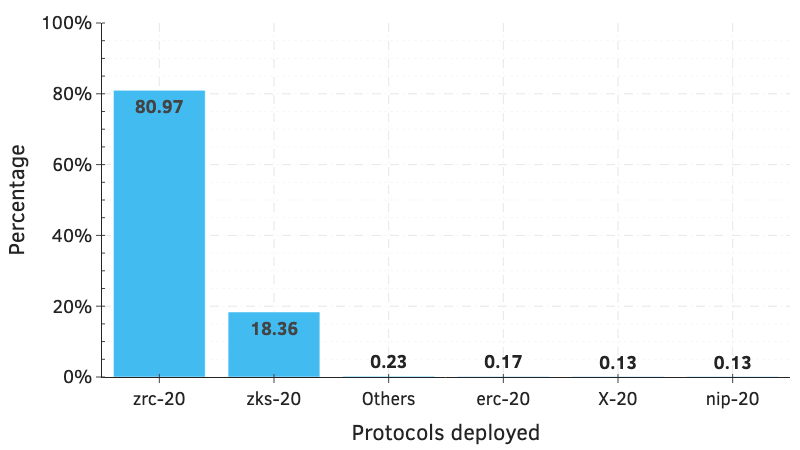

In [19]:
data = inscriptions_parsed.filter(pl.col('op').eq('deploy')).to_pandas().copy()
top_protocols = data['p'].value_counts().iloc[:5].index
data.loc[~data['p'].isin(top_protocols), 'p'] = 'Others'

print(data['p'].value_counts(normalize=False))
data = data['p'].value_counts(normalize=True)*100


fig = go.Figure(layout=get_plotly_layout(width=width, height=height))

fig.add_trace(go.Bar(x=data.index, y=data.values,
              marker_color=colors['blue'], textposition='auto', text=data.values.round(2), name='Protocols'))
fig.update_layout(yaxis_title="Percentage",
                  xaxis_title="Protocols deployed", yaxis_ticksuffix="%")

fig.update_traces(
    texttemplate='<b>%{text:,.4}</b>', textfont_size=18)
fig.update_yaxes(range=[0, 100])

fig.write_image(plots_dir+"top-15-deployed-protocols-zksync.pdf")

fig.show('png')

tick
sync      11057
zks        2415
Others      604
izks        319
zkzk        313
zkss        282
Name: count, dtype: int64


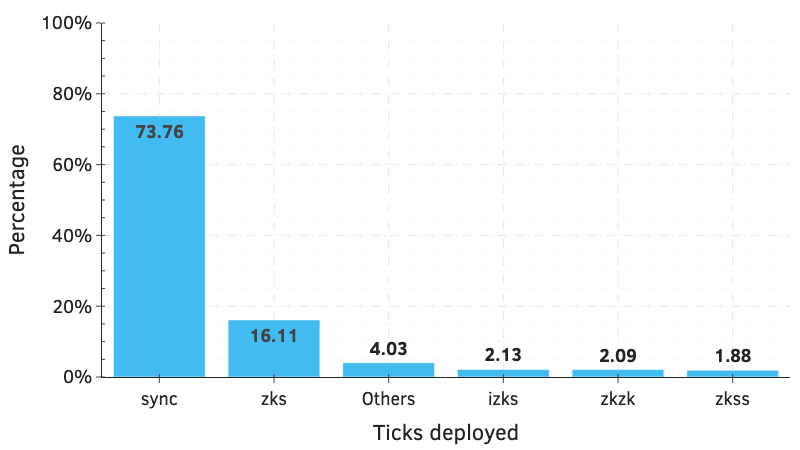

In [20]:
data = inscriptions_parsed.filter(pl.col('op').eq('deploy')).to_pandas().copy()
top_protocols = data['tick'].value_counts().iloc[:5].index
data.loc[~data['tick'].isin(top_protocols), 'tick'] = 'Others'

print(data['tick'].value_counts(normalize=False))
data = data['tick'].value_counts(normalize=True)*100


fig = go.Figure(layout=get_plotly_layout(width=width, height=height))

fig.add_trace(go.Bar(x=data.index, y=data.values,
              marker_color=colors['blue'], textposition='auto', text=data.values.round(2), name='Ticks'))
fig.update_layout(yaxis_title="Percentage",
                  xaxis_title="Ticks deployed", yaxis_ticksuffix="%")

fig.update_traces(
    texttemplate='<b>%{text:,.4}</b>', textfont_size=18)
fig.update_yaxes(range=[0, 100])

fig.write_image(plots_dir+"ticks-zksync.pdf")

fig.show('png')

In [21]:
# Loading all txs inscriptions dataframe from a file
all_txs_df = pl.scan_parquet(
    data_dir+'inscriptions_all_txs_df.parquet').collect(streaming=True)
print("There are {} txs in our dataset.".format(
    all_txs_df.shape[0]))
all_txs_df.head()

There are 289466141 txs in our dataset.


block_number,tx_hash,is_self_transfer,is_inscription,timestamp
i64,str,bool,bool,datetime[μs]
10000000,"""0x60b1dd4432b7…",false,false,2023-07-31 06:11:24
10000000,"""0x50225618b693…",false,false,2023-07-31 06:11:24
10000000,"""0xc9eca17d5877…",false,false,2023-07-31 06:11:24
10000000,"""0x56d6d32deef0…",false,false,2023-07-31 06:11:24
10000000,"""0x6dd263ae54dd…",false,false,2023-07-31 06:11:24


In [22]:
print("There are {} unique transactions in our dataset.".format(
    all_txs_df['tx_hash'].n_unique()))
print("There are {} unique blocks in our dataset.".format(
    all_txs_df['block_number'].n_unique()))
print("The average number of txs per block is {} txs.".format(round(
    all_txs_df['tx_hash'].n_unique()/all_txs_df['block_number'].n_unique(), 2)))

print("The minimum and max number of txs per block are: {} and {}.".format(
    all_txs_df['block_number'].min(), all_txs_df['block_number'].max()))

print("The minimum timestamp is {} and the maximum timestamp is {}.".format(
    all_txs_df['timestamp'].min(), all_txs_df['timestamp'].max()))

There are 289466141 unique transactions in our dataset.
There are 23070883 unique blocks in our dataset.
The average number of txs per block is 12.55 txs.
The minimum and max number of txs per block are: 6332862 and 29799866.
The minimum timestamp is 2023-06-18 02:04:06 and the maximum timestamp is 2024-03-25 02:19:14.


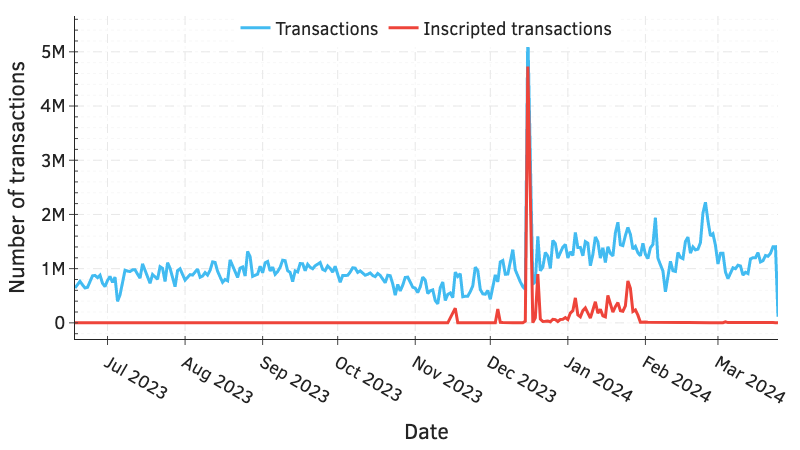

In [23]:
# Number of inscriptions in comparison to the total number of transactions per day on zkSync Era

all_txs_per_day = (all_txs_df[['block_number', 'timestamp']]
                   .sort('timestamp').group_by_dynamic("timestamp", every="1d")
                   .agg(pl.len()))

inscriptions_txs_per_day = (all_txs_df.filter(pl.col('is_inscription').eq(True))[['block_number', 'timestamp']]
                            .sort('timestamp')
                            .group_by_dynamic("timestamp", every="1d")
                            .agg(pl.len()))


fig = go.Figure(layout=get_plotly_layout(width=width, height=height))
fig.add_trace(go.Scatter(
    x=all_txs_per_day['timestamp'], y=all_txs_per_day['len'], line=dict(color=colors['blue'], width=3, dash='solid'), mode='lines', name='Transactions'))
fig.add_trace(go.Scatter(
    x=inscriptions_txs_per_day['timestamp'], y=inscriptions_txs_per_day['len'], line=dict(color=colors['red'], width=3, dash='solid'),  mode='lines', name='Inscripted transactions'))
# fig.add_trace(go.Scatter(
#     x=self_txs_per_day['timestamp'], y=self_txs_per_day['len'], line=dict(color=colors['green'], width=3, dash='solid'),  mode='lines', name='Self-transfer transactions'))

fig.update_layout(yaxis_title="Number of transactions",
                  xaxis_title="Date", legend=dict(xanchor='center',
                                                  x=0.5, y=1.02, orientation='h'))

fig.write_image(plots_dir+'fraction-of-inscriptions-zksync.pdf')
fig.show('png')

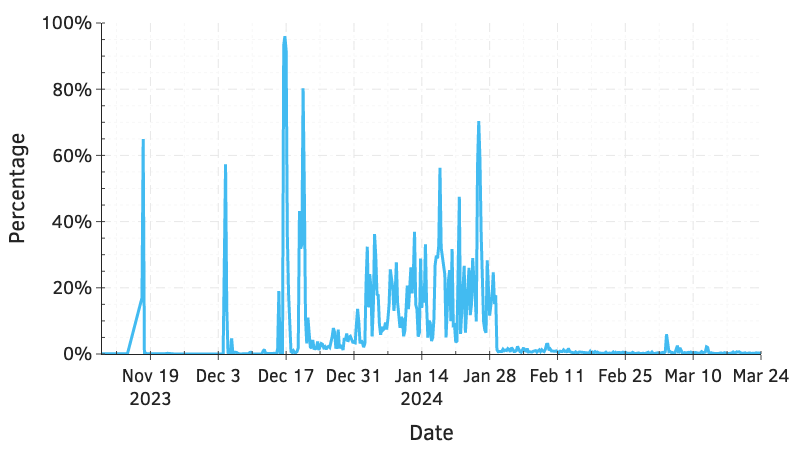

In [24]:
# Distribution of the percentage of inscriptions in comparison to the total number of transactions per week on zkSync

all_txs_per_day = (all_txs_df[['block_number', 'timestamp']]
                   .sort('timestamp').group_by_dynamic("timestamp", every="6h")
                   .agg(pl.len()))

inscriptions_txs_per_day = (all_txs_df.filter(pl.col('is_inscription').eq(True))[['block_number', 'timestamp']]
                            .sort('timestamp')
                            .group_by_dynamic("timestamp", every="6h")
                            .agg(pl.len()))

data = inscriptions_txs_per_day.join(all_txs_per_day, on='timestamp', how='left', suffix='_all_txs').with_columns(
    pl.col('len').truediv(pl.col('len_all_txs')).alias('fraction'))


fig = go.Figure(layout=get_plotly_layout(width=width, height=height))
fig.add_trace(go.Scatter(
    x=data['timestamp'], y=data['fraction']*100, line=dict(color=colors['blue'], width=3, dash='solid'), mode='lines', name='Transactions'))

fig.update_xaxes(range=['2023-11-09', '2024-03-24'])

fig.update_yaxes(range=[0, 100])

fig.update_layout(yaxis_title="Percentage",
                  xaxis_title="Date",  yaxis_ticksuffix="%", legend=dict(xanchor='center',
                                                                         x=0.5, y=1.02, orientation='h'))

fig.write_image(plots_dir+'fraction-of-inscriptions-zksync.pdf')
fig.show('png')